In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
apiKey = user_secrets.get_secret("request_key")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/clean-movie-dataset-10k/movies_clean_data.pkl
/kaggle/input/genres-list/genres_list.pkl
/kaggle/input/movies-dataset/Movies_dataset2.pkl


In [2]:
#importing the movies dataset of 10k movies
movies_dataset = pd.read_pickle('/kaggle/input/clean-movie-dataset-10k/movies_clean_data.pkl')
genres_list = pd.read_pickle('/kaggle/input/genres-list/genres_list.pkl')
movies_dataset

,adult,genre_ids,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count
0,False,[53],985939,en,Fall,"For best friends Becky and Hunter, life is all...",9320.962,2022-08-11,Fall,False,7.4,658
1,False,"[27, 9648, 878, 53]",762504,en,Nope,Residents in a lonely gulch of inland Californ...,1587.271,2022-07-20,Nope,False,7.0,1458
2,False,"[16, 10751, 35, 878]",1010821,en,Groot Takes a Bath,Everybody needs some alone time to relax and w...,964.024,2022-08-10,Groot Takes a Bath,False,7.0,129
3,False,"[28, 12, 14]",639933,en,The Northman,Prince Amleth is on the verge of becoming a ma...,725.515,2022-04-07,The Northman,False,7.2,2365
4,False,"[28, 12]",335787,en,Uncharted,"A young street-smart, Nathan Drake and his wis...",598.659,2022-02-10,Uncharted,False,7.1,3458
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,[10752],51200,ko,포화 속으로,A civil war broke out in the 1950s between Nor...,12.389,2010-06-16,71: Into the Fire,False,7.5,142
9996,False,"[28, 18, 36]",2669,en,The Bounty,"The familiar story of Lieutenant Bligh, whose ...",8.883,1984-05-04,The Bounty,False,6.7,412
9997,False,"[878, 27]",18983,en,"Godzilla, King of the Monsters!","During an assignment, foreign correspondent St...",11.381,1956-04-27,"Godzilla, King of the Monsters!",False,6.7,176
9998,False,"[18, 10749, 10751]",40724,en,Anne of Green Gables: The Sequel,"Anne Shirley, now a schoolteacher, has begun w...",11.128,1987-05-19,Anne of Green Gables: The Sequel,False,7.9,100


In [3]:
movies_dataset['original_language'].value_counts()

en    7331
ja     711
es     462
ko     325
fr     251
zh     154
it     127
cn     111
de      87
ru      60
pt      44
hi      37
pl      37
no      29
da      27
tl      26
th      21
sv      19
nl      18
id      15
tr      15
fi      11
te       9
ml       6
ta       5
bn       5
cs       4
uk       4
ca       4
ro       3
pa       3
el       3
xx       3
ar       3
fa       3
eu       2
sr       2
is       2
kn       2
hu       2
la       1
gu       1
km       1
sl       1
nb       1
lv       1
vi       1
sq       1
sk       1
hr       1
ga       1
eo       1
ms       1
mk       1
ab       1
mi       1
mr       1
Name: original_language, dtype: int64

In [4]:
movies_dataset['adult'].value_counts()

False    10000
Name: adult, dtype: int64

## Updating the genres list in the melt

In [5]:
genres_list

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


## Creating the movies dataset genre list

In [6]:
movies_dataset_list = pd.DataFrame(movies_dataset['genre_ids'].values.tolist()).add_prefix('genre_id_').fillna(0)
movies_dataset_list = movies_dataset_list[::].astype(int)
movies_dataset_list


,genre_id_0,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_id_7
0,53,0,0,0,0,0,0,0
1,27,9648,878,53,0,0,0,0
2,16,10751,35,878,0,0,0,0
3,28,12,14,0,0,0,0,0
4,28,12,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,10752,0,0,0,0,0,0,0
9996,28,18,36,0,0,0,0,0
9997,878,27,0,0,0,0,0,0
9998,18,10749,10751,0,0,0,0,0


In [7]:
movies_analysis_melt = pd.melt(movies_dataset_list)
movies_analysis_melt['value'] = movies_analysis_melt['value'].replace(genres_list['id'].values,genres_list['name'].values)
movies_analysis_melt = movies_analysis_melt[movies_analysis_melt['value'] != 0]
movies_analysis_melt

,variable,value
0,genre_id_0,Thriller
1,genre_id_0,Horror
2,genre_id_0,Animation
3,genre_id_0,Action
4,genre_id_0,Action
...,...,...
69893,genre_id_6,Fantasy
70161,genre_id_7,Thriller
73933,genre_id_7,TV Movie
79137,genre_id_7,Mystery


In [8]:
genre_value_counts = pd.DataFrame(movies_analysis_melt['value'].value_counts())
genre_value_counts

,value
Drama,3737
Comedy,2884
Action,2659
Thriller,2514
Adventure,1763
Horror,1514
Romance,1512
Animation,1473
Family,1363
Fantasy,1320


[Text(0, 0, '3737'),
 Text(0, 0, '2884'),
 Text(0, 0, '2659'),
 Text(0, 0, '2514'),
 Text(0, 0, '1763'),
 Text(0, 0, '1514'),
 Text(0, 0, '1512'),
 Text(0, 0, '1473'),
 Text(0, 0, '1363'),
 Text(0, 0, '1320'),
 Text(0, 0, '1253'),
 Text(0, 0, '1173'),
 Text(0, 0, '809'),
 Text(0, 0, '415'),
 Text(0, 0, '282'),
 Text(0, 0, '278'),
 Text(0, 0, '239'),
 Text(0, 0, '222'),
 Text(0, 0, '118')]

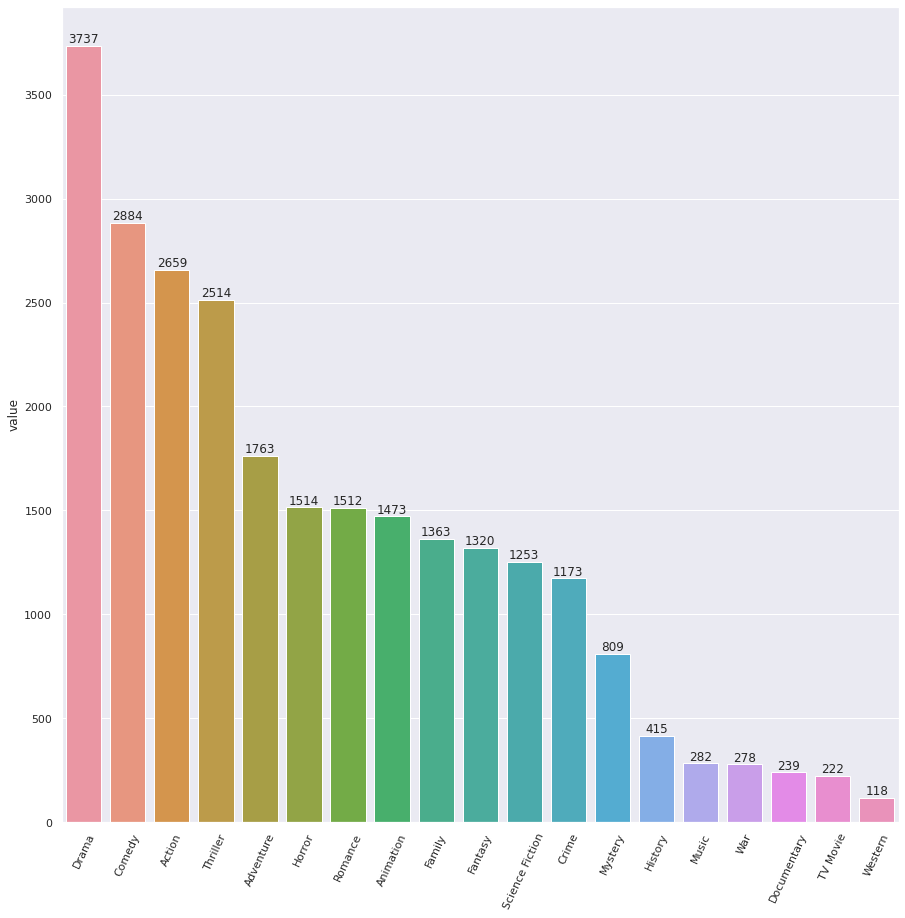

In [9]:
sns.set(style='darkgrid',rc={'figure.figsize':(15,15)})
genre_plot = sns.barplot(x=genre_value_counts.index,y=genre_value_counts['value'])
genre_plot.set_xticklabels(genre_plot.get_xticklabels(),rotation=65)
genre_plot.bar_label(genre_plot.containers[0])

In [10]:
movies_dataset = movies_dataset.join(movies_dataset_list)
movies_dataset

,adult,genre_ids,id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,genre_id_0,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_id_7
0,False,[53],985939,en,Fall,"For best friends Becky and Hunter, life is all...",9320.962,2022-08-11,Fall,False,7.4,658,53,0,0,0,0,0,0,0
1,False,"[27, 9648, 878, 53]",762504,en,Nope,Residents in a lonely gulch of inland Californ...,1587.271,2022-07-20,Nope,False,7.0,1458,27,9648,878,53,0,0,0,0
2,False,"[16, 10751, 35, 878]",1010821,en,Groot Takes a Bath,Everybody needs some alone time to relax and w...,964.024,2022-08-10,Groot Takes a Bath,False,7.0,129,16,10751,35,878,0,0,0,0
3,False,"[28, 12, 14]",639933,en,The Northman,Prince Amleth is on the verge of becoming a ma...,725.515,2022-04-07,The Northman,False,7.2,2365,28,12,14,0,0,0,0,0
4,False,"[28, 12]",335787,en,Uncharted,"A young street-smart, Nathan Drake and his wis...",598.659,2022-02-10,Uncharted,False,7.1,3458,28,12,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,[10752],51200,ko,포화 속으로,A civil war broke out in the 1950s between Nor...,12.389,2010-06-16,71: Into the Fire,False,7.5,142,10752,0,0,0,0,0,0,0
9996,False,"[28, 18, 36]",2669,en,The Bounty,"The familiar story of Lieutenant Bligh, whose ...",8.883,1984-05-04,The Bounty,False,6.7,412,28,18,36,0,0,0,0,0
9997,False,"[878, 27]",18983,en,"Godzilla, King of the Monsters!","During an assignment, foreign correspondent St...",11.381,1956-04-27,"Godzilla, King of the Monsters!",False,6.7,176,878,27,0,0,0,0,0,0
9998,False,"[18, 10749, 10751]",40724,en,Anne of Green Gables: The Sequel,"Anne Shirley, now a schoolteacher, has begun w...",11.128,1987-05-19,Anne of Green Gables: The Sequel,False,7.9,100,18,10749,10751,0,0,0,0,0


In [11]:
movies_dataset.iloc[::,12::]

,genre_id_0,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_id_7
0,53,0,0,0,0,0,0,0
1,27,9648,878,53,0,0,0,0
2,16,10751,35,878,0,0,0,0
3,28,12,14,0,0,0,0,0
4,28,12,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9995,10752,0,0,0,0,0,0,0
9996,28,18,36,0,0,0,0,0
9997,878,27,0,0,0,0,0,0
9998,18,10749,10751,0,0,0,0,0
